## What are language models?
Language models are machine learning models that are trained on vast troves of text data. By doing so, they can learn to identify the patterns inherent within a given language—like grammar, syntax, and vocabulary usage—offering them new capabilities. Some potential use cases include creating automated responses for chatbots, generating website content, writing emails, answering questions, automating document editing, summarizing contents, conducting sentiment analysis, improving voice assistants response coherence and interactions, adding more human-like conversational features, etc.

## 🔖Large Language Models (LLMs): An Overview🏗️
Large Language Models (LLMs) are pretrained generative models specialised at performing complex tasks involving language and text data. These models receive input sequences and predict tokens, producing highly informative outputs. The sheer size of these models - billions of parameters and multiple layers – gives them remarkable ability to comprehend contextual meaning, making them capable performers across numerous downstream linguistic jobs. Prominent examples of platforms built around LLMs are the ubiquitous ChatGpt, powered by the gigantic Transformer architecture named GPT-4.

Today we are going to compare a few of such LLMs.

## Dolly 🐑
["Dolly"](https://www.databricks.com/blog/2023/04/12/dolly-first-open-commercially-viable-instruction-tuned-llm) is a large language model developed by Databricks. It's an open-source large language model and is trained on an open-source dataset which is known as ["databricks-dolly-15k"](https://github.com/databrickslabs/dolly/tree/master/data).

>The story behind the creation of the dataset is quite interesting. You can read about how the datset was created [here](https://www.databricks.com/blog/2023/04/12/dolly-first-open-commercially-viable-instruction-tuned-llm).

## Let’s give it a shot
In order to take advantage of the capabilities of the Dolly model using Hugging Face, we will leverage their API for rapid and easy implementation.

First I will install the required libraires. 

In [1]:
!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.13.4
    Uninstalling huggingface-hub-0.13.4:
      Successfully uninstalled huggingface-hub-0.13.4
  Attempting uninstall: transformers
    Found existing installation: transformers 4.28.1
    Uninstalling transformers-4.28.1:
      Successfully uninstalled transformers-4.28.1


In [2]:
!pip install --upgrade bitsandbytes datasets accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 22.5 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.12.0
    Uninstalling accelerate-0.12.0:
      Successfully uninstalled accelerate-0.12.0
  Attempting uninstall: datasets
    Found existing installation: datasets 2.1.0
    Uninstalling datasets-2.1.0:
      Successfully uninstalled datasets-2.1.0


In [3]:
import torch
from transformers import pipeline, AutoConfig, AutoModelForCausalLM, AutoTokenizer, StoppingCriteria, StoppingCriteriaList

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Our primary objective today is not to delve into the intricacies of coding. Instead, we aim to conduct an investigation based on the capabilities of various chatbots.

We will load the Dolly Language Model using the `pipeline` API from the Transformers library by Huggingface. Utilize this exact code if running on reduced spec hardware.

In [4]:
generate_text = pipeline(model="databricks/dolly-v2-3b",
                         torch_dtype=torch.bfloat16,
                         device_map="auto",
                         trust_remote_code=True)

A new version of the following files was downloaded from https://huggingface.co/databricks/dolly-v2-3b:
- instruct_pipeline.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Now, that the model is loaded let's give it some task. How about asking it to write a song for us?

We will give it the following prompt 

> Can you write a song about a frog at sea?

In [5]:
res = generate_text("Can you write a song about a frog at sea?")
print(res[0]["generated_text"])

Sure! Here's one I wrote about a tiddly lubberly frog at sea:

Lazy, lubberly, frog,
Sea-sick, out of sight,
Crawling, up on my chin,
As I lay here, in my little hollow.

Then the fog blows in,
And my thoughts begin,
Of all the fonder places I've been,
In the sea and out of the sea,

All the fonder places I've been,
In the sea and out of the sea,
Far away in Spain,
On the Isle of Wight,

But my lonesome Home it stands,
Where the birds sing,
Where the white hens scratch,
Where the mavis sings,

Where the pools are clean,
Where I sit on the bank,
Frog, sail on your back,
Where the rivers run,

Where the road goes by,
Home, home on the highway,
Frog, sail on your back,
Where the roads go by,

Home, home on the highway,
Frog, sail on your back,
Where the roads go by,
Frog, sail on


## 🐑 Comparing Dolly to huggingchat 🤗
[HuggingChat](https://huggingface.co/chat/) is an open source chatbot developed by HuggingFace. It uses the OpenAssistant-LLaMa-30B-SFT-6 LLM under its hood. Check out this [link](https://huggingface.co/OpenAssistant/oasst-sft-6-llama-30b-xor) for more information about the model. The Dolly model in itself is not a chatbot and we aren’t evaluating the chatbot functions but rather the language modelling abilities present in the Dolly model.

Let's provide the follwing prompt-

> "Can you write a song about a frog at sea?" 

As you can see both the models (Dolly, Openassistant) produced good, readable, well rhymed song.

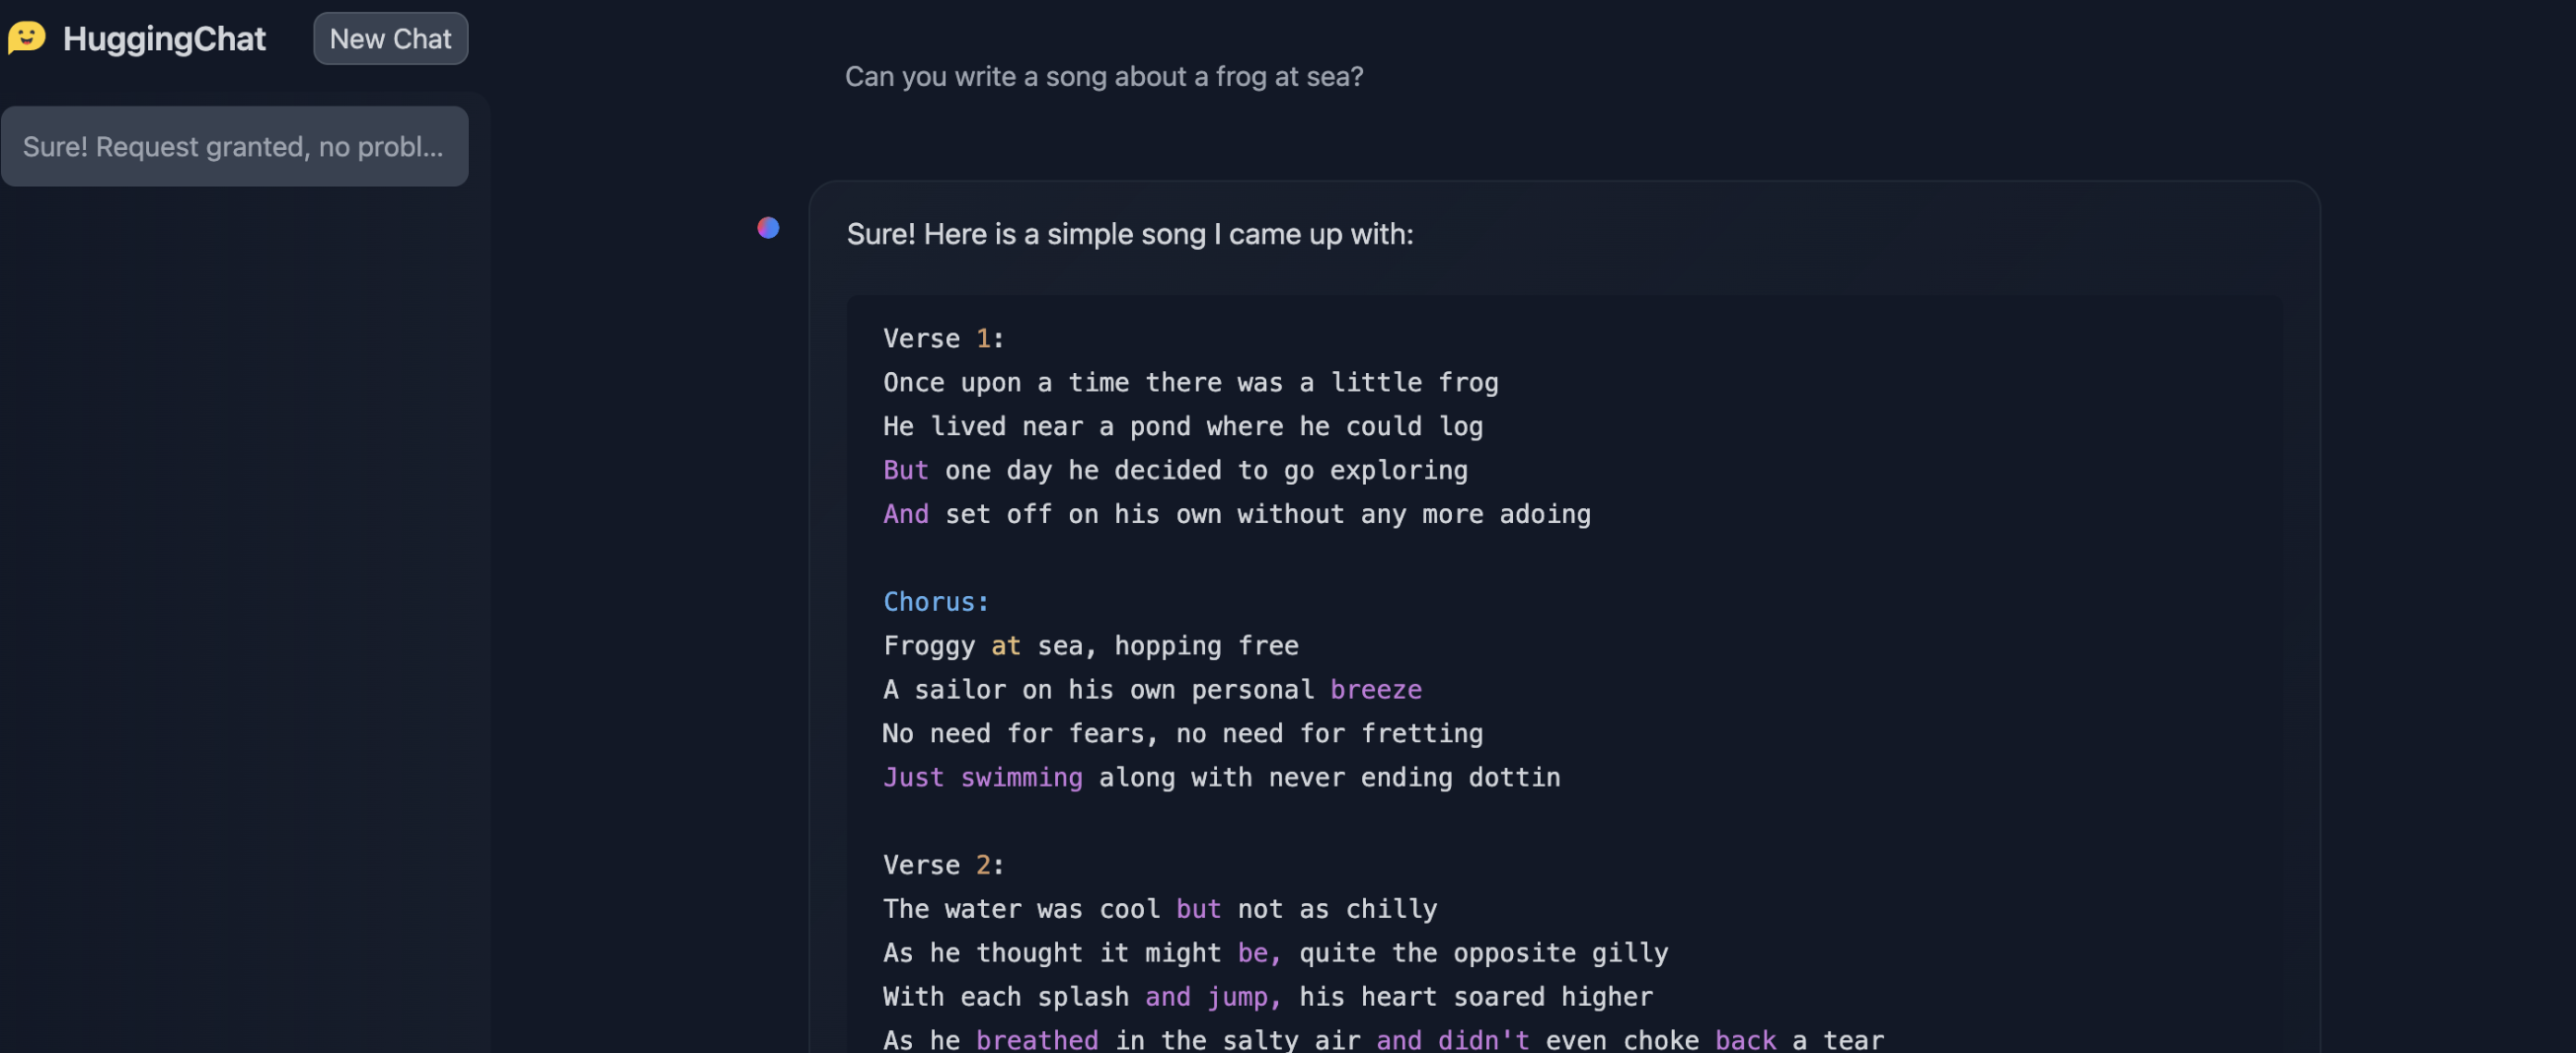

In [6]:
from IPython.display import Image
Image("/kaggle/input/images/hfchat-song.png")

## Points to note
The Dolly model is small when compared to the Llama/Open Assitant model but still provides excellent outputs. Did you see how the Hugging Chat partitioned the track into Verse 1, Chorus, Verse 2, etc.?

## Let's try to generate code
We will write a prompt that would instruct the model to generate a fibonacci series. The prompt would look like this -

> write a python program which generates fibonacci sequence

```
res = generate_text("write a python program which generates fibonacci sequence")
print(res[0]["generated_text"])
```

let's run the code to see what it gives

In [7]:
def fibonacci(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)
    
fibonacci(10)

55

I knew that the outcome wouldn’t be significant, but I desired to operate the program as-is to display how Dolly stands versus its competitors. Bear in mind that the produced code cannot be employed without modification; you should adjust it before using it in earnest.

let's check what huggingchat generates

**Note** - At the time of writing this, the starcoder model was available in huggignface-chat but due to some reason it's not available in the chat-UI now. However, you can access this model using the Huggignface API [here](https://huggingface.co/bigcode/starcoder)

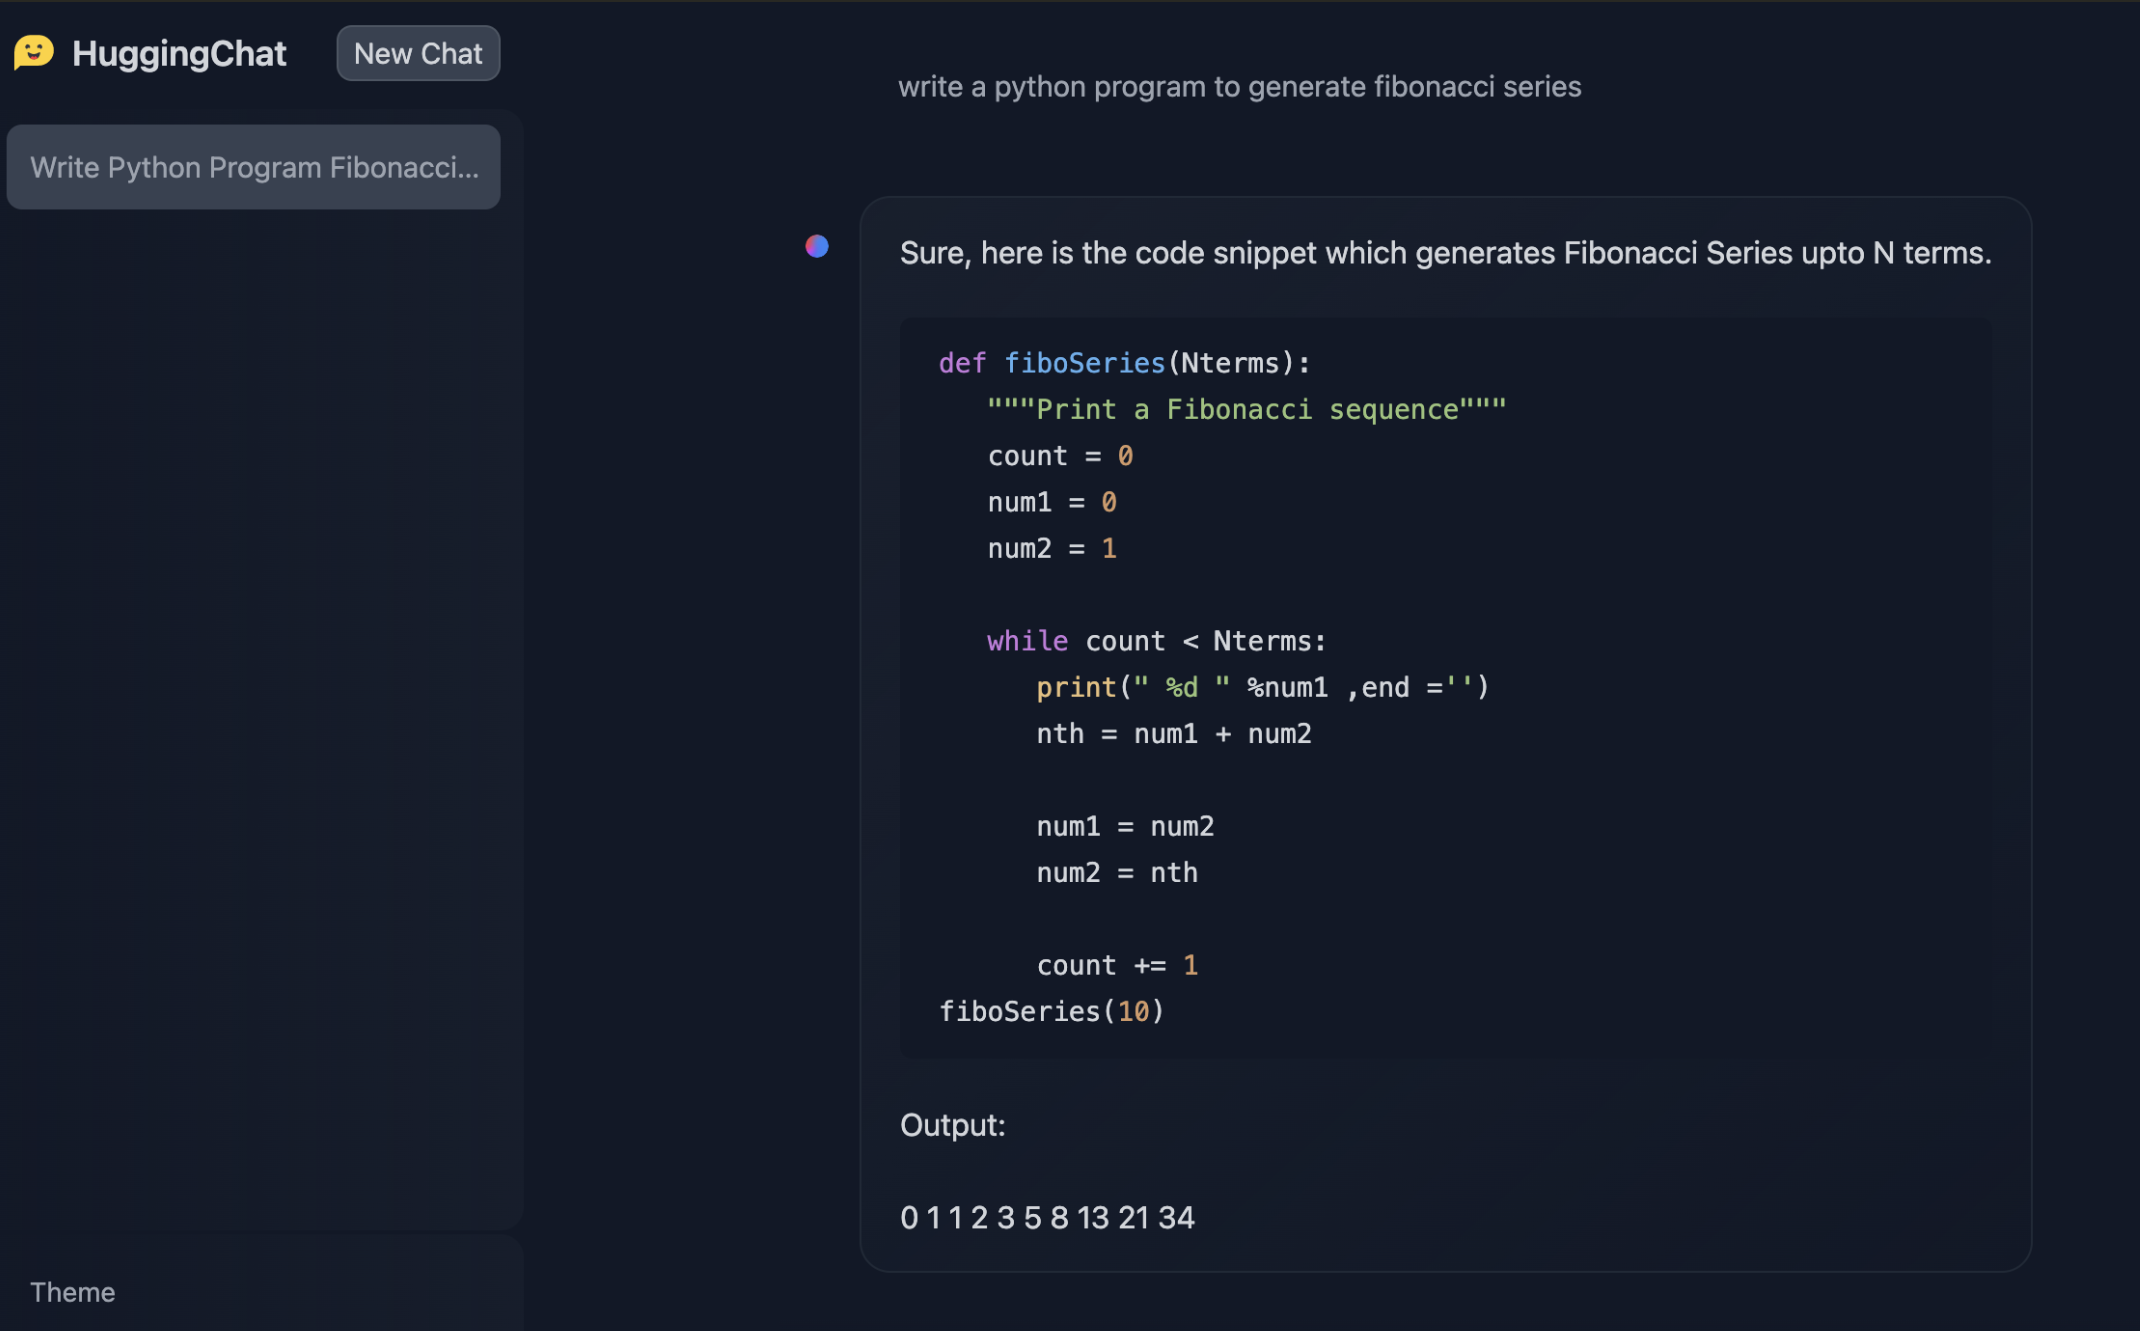

In [8]:
from IPython.display import Image
Image("/kaggle/input/images/hfchat-code.png")

let's run the code

In [9]:
def fiboSeries(Nterms): 
   """Print a Fibonacci sequence"""
   count = 0
   num1 = 0
   num2 = 1

   while count < Nterms:
      print(" %d " %num1 ,end ='')
      nth = num1 + num2

      num1 = num2
      num2 = nth
      
      count += 1
fiboSeries(10) 

 0  1  1  2  3  5  8  13  21  34 

## Points to note
[Starcoder model](https://huggingface.co/bigcode/starcoderbase) available through HuggingChat, was my pick for this evaluation. It yields higher quality output than what Dolly generates and is usable off the shelf. Remember that even though Dolly has smaller dimensions than Starcoder, optimizations could lead to improved performance. Could finetuning Doly for coding improve performance? Let’s explore this idea further.

Let's check another chat model.This time i will try the same prompt in OpenAI's chatgpt API exposed via microsoft's bing.

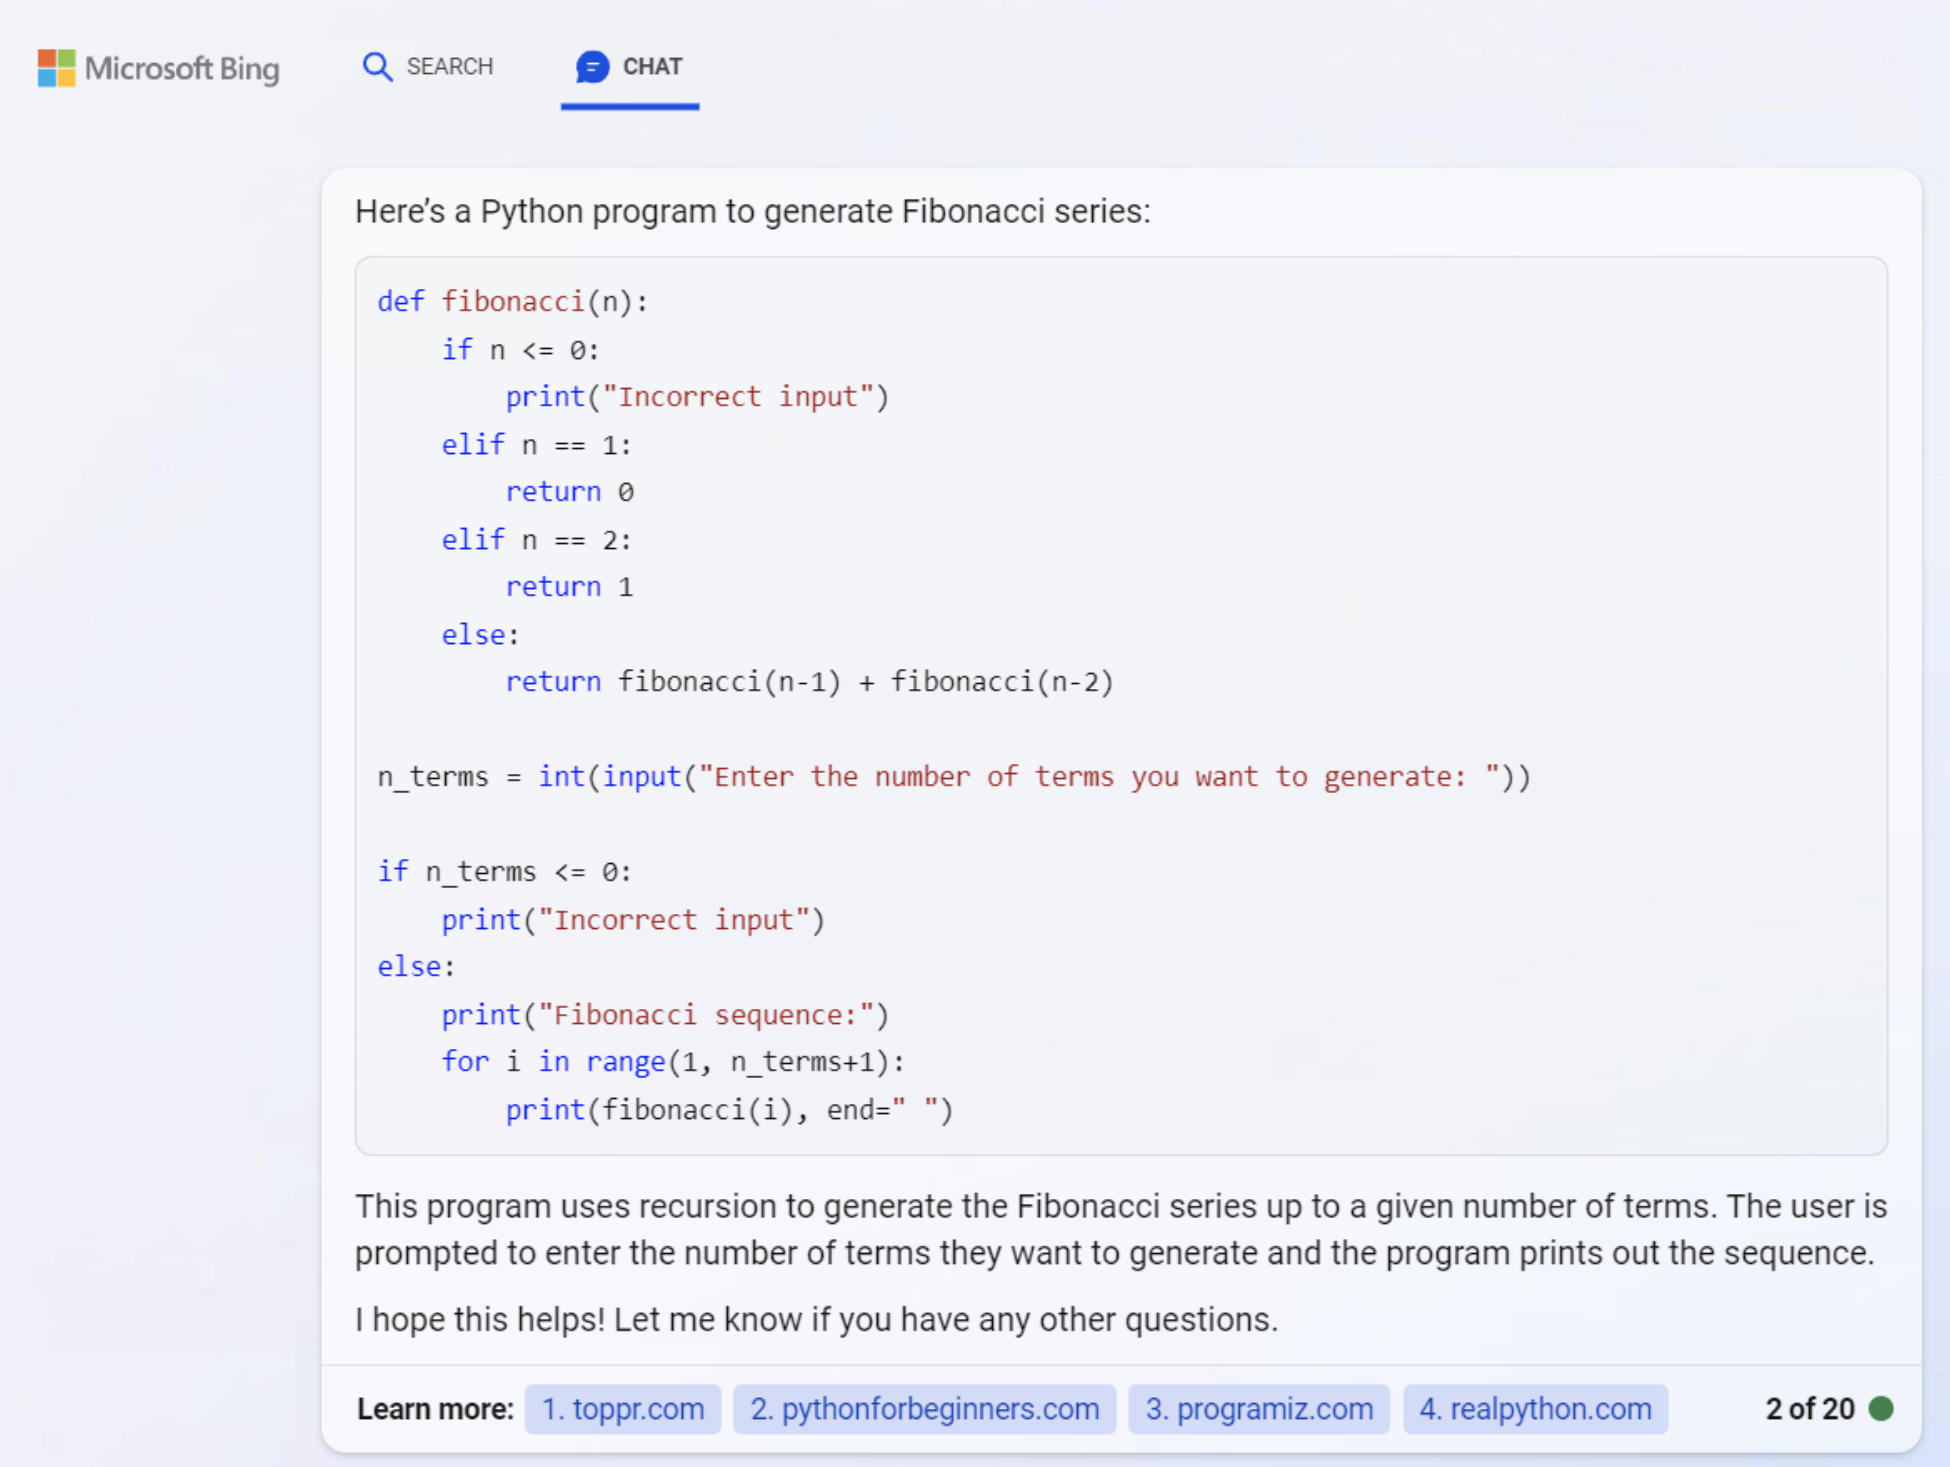

In [10]:
from IPython.display import Image
Image("/kaggle/input/images/bingchat-code.png")

let's run the code.

In [11]:
def fibonacci(n):
    if n <= 0:
        print("Incorrect input")
    elif n == 1:
        return 0
    elif n == 2:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

n_terms = int(10)

if n_terms <= 0:
    print("Incorrect input")
else:
    print("Fibonacci sequence:")
    for i in range(1, n_terms+1):
        print(fibonacci(i), end=" ")

Fibonacci sequence:
0 1 1 2 3 5 8 13 21 34 

Here too the generated program looks good and the code is comparable to the huggingface starcoder model.

## Here comes StabilityLM
Here we shall discuss the StabilityAI language model referred to as "stablelm-tuned-alpha-3b." It's a decoder-only model based on the StableLM-Base-Alpha versions, further refined using several chat and instruction completion datasets. Commercial use of these models is currently not available. These models have undergone training on five datasets, including the Dolly dataset upon which the Dolly model was trained. Please find below an image depicting details of the stablelm-tuned-alpha-3b model taken from its Hugging Face page.

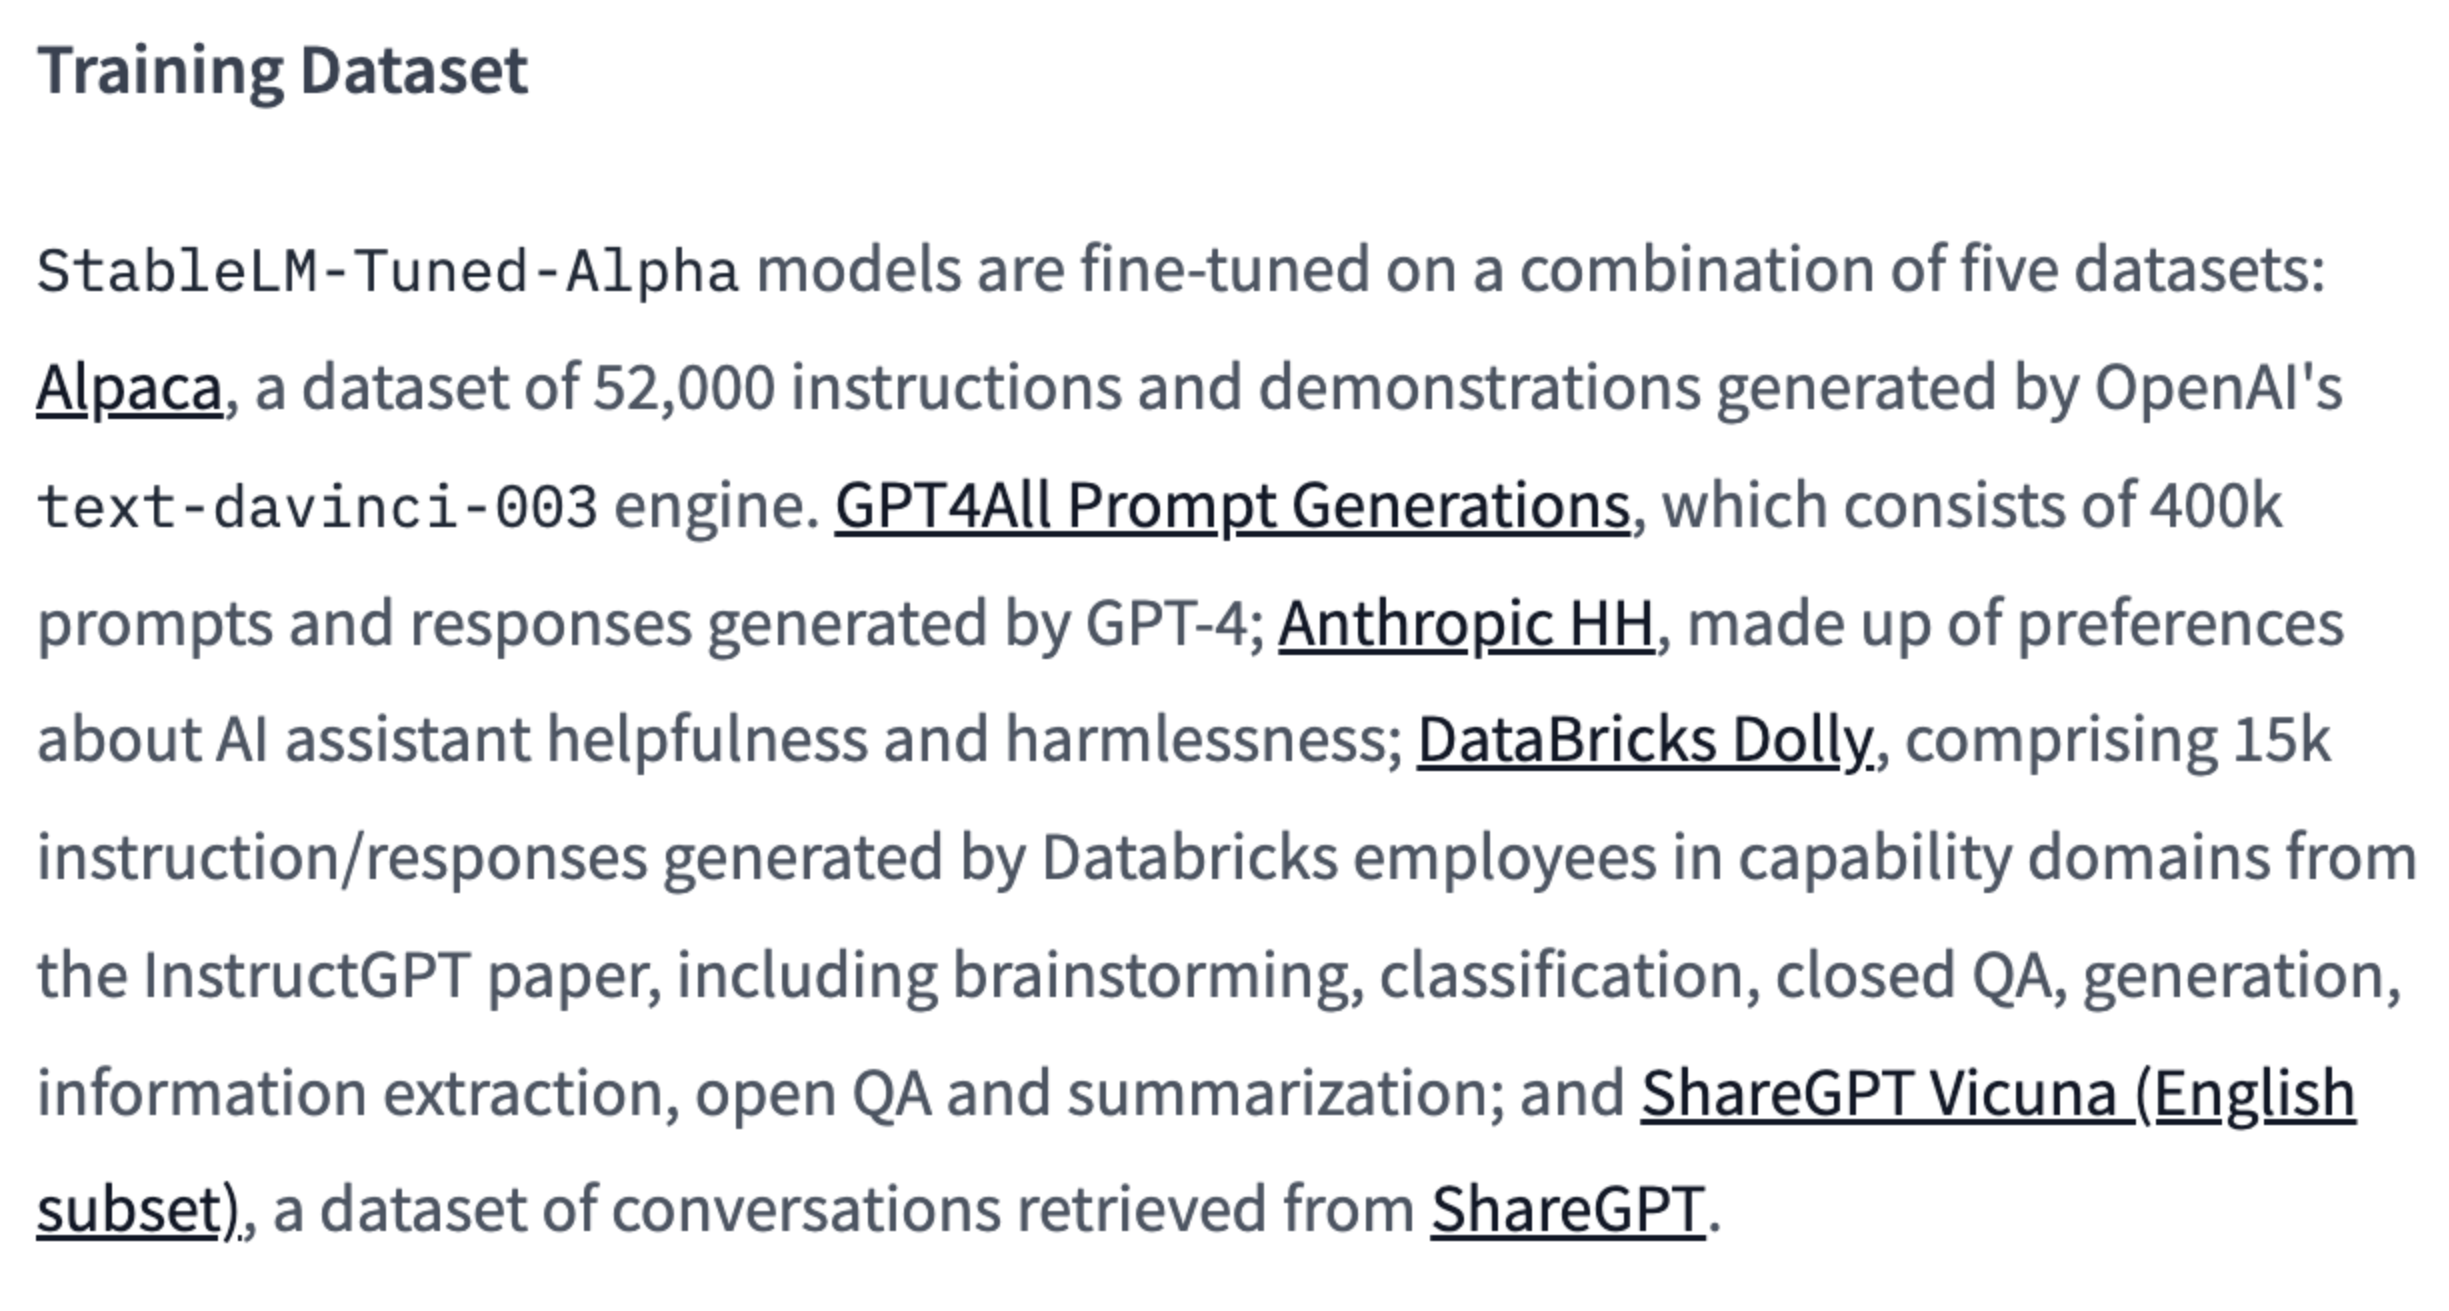

In [12]:
from IPython.display import Image
Image("/kaggle/input/images/stablem-details.png")

## Let's check it out
The starter code is directly taken from the model's [Huggingface model page](https://huggingface.co/stabilityai/stablelm-tuned-alpha-3b). We will not try to dig into the code as we are doing a sort of blackbox comparison of models.

In [13]:
model_name = "stabilityai/stablelm-tuned-alpha-3b"
tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModelForCausalLM.from_pretrained(model_name, 
                                             torch_dtype=getattr(torch, "float16"),
                                             load_in_8bit=False,
                                             device_map="auto")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [14]:
class StopOnTokens(StoppingCriteria):
    def __call__(self, input_ids: torch.LongTensor, scores: torch.FloatTensor, **kwargs) -> bool:
        stop_ids = [50278, 50279, 50277, 1, 0]
        for stop_id in stop_ids:
            if input_ids[0][-1] == stop_id:
                return True
        return False

In [15]:
user_prompt = "Can you write a song about a frog at sea?" #@param {type:"string"}
if "tuned" in model_name:
    # Add system prompt for chat tuned models
    system_prompt = """<|SYSTEM|># StableLM Tuned (Alpha version)
    - StableLM is a helpful and harmless open-source AI language model developed by StabilityAI.
    - StableLM is excited to be able to help the user, but will refuse to do anything that could be considered harmful to the user.
    - StableLM is more than just an information source, StableLM is also able to write poetry, short stories, and make jokes.
    - StableLM will refuse to participate in anything that could harm a human.
    """
    prompt = f"{system_prompt}<|USER|>{user_prompt}<|ASSISTANT|>"
else:
    prompt = user_prompt

# Sampling args
max_new_tokens = 128 
temperature = 0.7 
top_k = 0 
top_p = 0.9 
do_sample = True 

# Create `generate` inputs
inputs = tokenizer(prompt, return_tensors="pt")
inputs.to(model.device)

# Generate
tokens = model.generate(
    **inputs,
    max_new_tokens=max_new_tokens,
    temperature=temperature,
    top_k=top_k,
    top_p=top_p,
    do_sample=do_sample,
    pad_token_id=tokenizer.eos_token_id,
    stopping_criteria=StoppingCriteriaList([StopOnTokens()])
)

In [16]:
completion_tokens = tokens[0][inputs['input_ids'].size(1):]
completion = tokenizer.decode(completion_tokens, skip_special_tokens=True)

# Display
print(user_prompt + " ", end="")
print(completion)

Can you write a song about a frog at sea? Sure, here's a simple song about a frog at sea:

Verse 1:
I'm a little frog at sea
With a heart so big and free
I'm swimming through the waves, just like a fish
With my little frog hat on my head

Chorus:
Frogs at sea
Bring joy to all, you say
With your sweet little song
We'll dance and play, all day

Verse 2:
But I'm not alone, I've got a friend
A little frog with a heart so true
He helps me keep calm, through the storm


## Points to note
The song produced by stableLM is as good as the songs generated by the dolly model, openassistant, gpt. Look at how the stableLM also divides the song into verse1, Chorus etc.

Let's try to generate some code.

In [17]:
user_prompt = "write a python program which generates fibonacci sequence" #@param {type:"string"}
if "tuned" in model_name:
    # Add system prompt for chat tuned models
    system_prompt = """<|SYSTEM|># StableLM Tuned (Alpha version)
    - StableLM is a helpful and harmless open-source AI language model developed by StabilityAI.
    - StableLM is excited to be able to help the user, but will refuse to do anything that could be considered harmful to the user.
    - StableLM is more than just an information source, StableLM is also able to write poetry, short stories, and make jokes.
    - StableLM will refuse to participate in anything that could harm a human.
    """
    prompt = f"{system_prompt}<|USER|>{user_prompt}<|ASSISTANT|>"
else:
    prompt = user_prompt

# Sampling args
max_new_tokens = 128 
temperature = 0.7
top_k = 0 
top_p = 0.9 
do_sample = True 

# Create `generate` inputs
inputs = tokenizer(prompt, return_tensors="pt")
inputs.to(model.device)

# Generate
tokens = model.generate(
    **inputs,
    max_new_tokens=max_new_tokens,
    temperature=temperature,
    top_k=top_k,
    top_p=top_p,
    do_sample=do_sample,
    pad_token_id=tokenizer.eos_token_id,
    stopping_criteria=StoppingCriteriaList([StopOnTokens()])
)

In [18]:
completion_tokens = tokens[0][inputs['input_ids'].size(1):]
completion = tokenizer.decode(completion_tokens, skip_special_tokens=True)

# Display
print(user_prompt + " ", end="")
print(completion)

write a python program which generates fibonacci sequence Here is a Python program that generates a Fibonacci sequence:

```python
def fibonacci_sequence():
    n = len(set(A))
    a = [0, 1]
    for i in range(n):
        for j in range(i + 1, n):
            if j > 0:
                a[j] = a[j - 1] + a[j - 2]
    print(a)

# Example usage
fibonacci_sequence()
```

This program defines a function `fibonacci_sequence` that


In [19]:
def fibonacci_sequence():
    n = len(list(map(int, [0,10])))
    for i in range(n):
        for j in range(0, n):
            if i == j:
                yield i, j

In [20]:
print(list(fibonacci_sequence()))

[(0, 0), (1, 1)]


## Points to note
The code in the previous section took a few tries to generate. The generated code would require some more tweaking to customise and maybe the prompt needs to be better designed or maybe there are some paramaters that we can tune to get a decent code. 

## Conclusion
I understand how overwhelming monitoring new large language models (LLMs) can be. However, my goal here isn't benchmarking all available options, but providing a panoramic view of various models. Unfortunately, topics such as tweaking parameters, improving prompt quality, and discovering advanced capabilities aren't covered here.